### PWC CALL CENTER DATA ANALYSIS

In [141]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
## Import dataset
pwc_call = pd.read_excel('01 Call-Center-Dataset.xlsx')
pwc_call

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0
...,...,...,...,...,...,...,...,...,...,...
4995,ID4996,Jim,2021-03-31,16:37:55,Payment related,Y,Y,22.0,00:05:40,1.0
4996,ID4997,Diane,2021-03-31,16:45:07,Payment related,Y,Y,100.0,00:03:16,3.0
4997,ID4998,Diane,2021-03-31,16:53:46,Payment related,Y,Y,84.0,00:01:49,4.0
4998,ID4999,Jim,2021-03-31,17:02:24,Streaming,Y,Y,98.0,00:00:58,5.0


### GENERAL ANALYSIS

In [143]:
## Determine the call
pwc_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


There are 10 columns and 5000 rows in the dataset

In [144]:
## sums up the null values
pwc_call.isnull().sum()

Call Id                         0
Agent                           0
Date                            0
Time                            0
Topic                           0
Answered (Y/N)                  0
Resolved                        0
Speed of answer in seconds    946
AvgTalkDuration               946
Satisfaction rating           946
dtype: int64

From the data, we have 946 null values in the Speed of answer in seconds,AvgTalkDuration and Satisfaction rating columns

### UNIVARIATE ANALYSIS

In [145]:
pwc_call.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')

### Call Id

In [146]:
pwc_call['Call Id'].value_counts()

ID0001    1
ID3331    1
ID3338    1
ID3337    1
ID3336    1
         ..
ID1667    1
ID1666    1
ID1665    1
ID1664    1
ID5000    1
Name: Call Id, Length: 5000, dtype: int64

Each Call received was given a unique Id 

### Agent

In [147]:
pwc_call.Agent.value_counts()

Jim        666
Martha     638
Diane      633
Dan        633
Becky      631
Greg       624
Joe        593
Stewart    582
Name: Agent, dtype: int64

out of a total of 5000 calls, Jim recieved or declined a total of 666 being the highest and Stewart received or declined a total of 582 being the least

### Date

In [148]:
pwc_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call Id                     5000 non-null   object 
 1   Agent                       5000 non-null   object 
 2   Date                        5000 non-null   object 
 3   Time                        5000 non-null   object 
 4   Topic                       5000 non-null   object 
 5   Answered (Y/N)              5000 non-null   object 
 6   Resolved                    5000 non-null   object 
 7   Speed of answer in seconds  4054 non-null   float64
 8   AvgTalkDuration             4054 non-null   object 
 9   Satisfaction rating         4054 non-null   float64
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


it can be observed that the data column is recognised as an object instead of a date and must therefore be converted into a datetime type

In [149]:
### converting the date column from object type to a Datetime 
pwc_call.Date = pwc_call.Date.apply(pd.to_datetime)
pwc_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     5000 non-null   object        
 1   Agent                       5000 non-null   object        
 2   Date                        5000 non-null   datetime64[ns]
 3   Time                        5000 non-null   object        
 4   Topic                       5000 non-null   object        
 5   Answered (Y/N)              5000 non-null   object        
 6   Resolved                    5000 non-null   object        
 7   Speed of answer in seconds  4054 non-null   float64       
 8   AvgTalkDuration             4054 non-null   object        
 9   Satisfaction rating         4054 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 390.8+ KB


The Date is now recognised a datetime type

In [150]:
pwc_call.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')

### Topic

In [151]:
pwc_call.Topic.value_counts()

Streaming            1022
Technical Support    1019
Payment related      1007
Contract related      976
Admin Support         976
Name: Topic, dtype: int64

out of the 5000 call received, 1022, being the maximum were made in respect to streaming and 976 being the least were made Admin Support

### Answered (Y/N)

In [152]:
pwc_call['Answered (Y/N)'].value_counts()

Y    4054
N     946
Name: Answered (Y/N), dtype: int64

4054 call were answered and the remaing 946 calls were not answered

In [153]:
pwc_call.columns

Index(['Call Id', 'Agent', 'Date', 'Time', 'Topic', 'Answered (Y/N)',
       'Resolved', 'Speed of answer in seconds', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')

### Resolved

In [154]:
pwc_call.Resolved.value_counts()

Y    3646
N    1354
Name: Resolved, dtype: int64

3646 answered calls were resolved and 1354 were not resolved

### Speed of answer in seconds

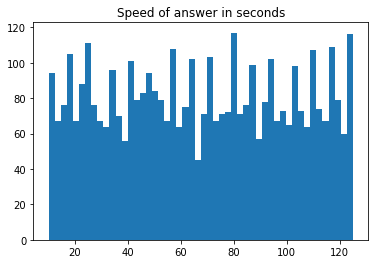

In [155]:
plt.hist(pwc_call['Speed of answer in seconds'], bins = 50)
plt.title('Speed of answer in seconds')
plt.show()

In [156]:
pwc_call['Speed of answer in seconds'].describe()

count    4054.000000
mean       67.520720
std        33.592872
min        10.000000
25%        39.000000
50%        68.000000
75%        97.000000
max       125.000000
Name: Speed of answer in seconds, dtype: float64

50% of the call received, representing 2500, were answered in 68 seconds
the longest took 125 seconds whiles the fastest took 10 seconds

### Satisfaction rating

In [157]:
### Counting the number of customers per rating 
pwc_call['Satisfaction rating'].value_counts()

3.0    1218
4.0    1180
5.0     843
1.0     417
2.0     396
Name: Satisfaction rating, dtype: int64

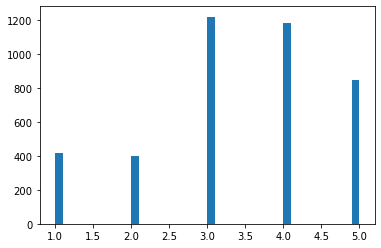

In [158]:
plt.hist(pwc_call['Satisfaction rating'], bins = 40)
plt.show()

In [159]:
pwc_call['Satisfaction rating'].describe()

count    4054.000000
mean        3.403552
std         1.212220
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Satisfaction rating, dtype: float64

from the data, 50% of all customers , reprsenting 2500 calls gave a rating of 3 with 
the highest rating being 5 and the least being 1

### MULTIVARIATE ANALYSIS

In [160]:
pwc_call.head(2)

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0


### How many calls were answered and unanswered by each Agent

In [161]:
pwc_call.groupby('Agent')['Answered (Y/N)'].value_counts()

Agent    Answered (Y/N)
Becky    Y                 517
         N                 114
Dan      Y                 523
         N                 110
Diane    Y                 501
         N                 132
Greg     Y                 502
         N                 122
Jim      Y                 536
         N                 130
Joe      Y                 484
         N                 109
Martha   Y                 514
         N                 124
Stewart  Y                 477
         N                 105
Name: Answered (Y/N), dtype: int64

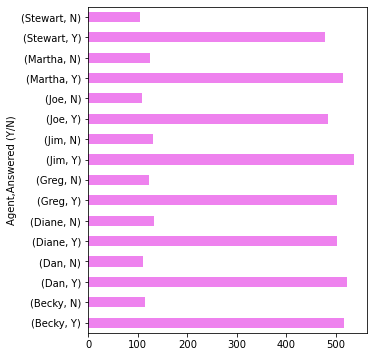

In [162]:
## using the "barh" 
pwc_call.groupby('Agent')['Answered (Y/N)'].value_counts().plot(kind = 'barh', figsize=(5,6), fontsize = 10 , color ='violet')
plt.show()

In [163]:
### Counting the number of calls answered(Y) by each agent
pwc_call[pwc_call['Answered (Y/N)'] == 'Y'].groupby('Agent')['Answered (Y/N)'].count().reset_index().sort_values(by = 'Answered (Y/N)', ascending = False )

,Agent,Answered (Y/N)
4,Jim,536
1,Dan,523
0,Becky,517
6,Martha,514
3,Greg,502
2,Diane,501
5,Joe,484
7,Stewart,477


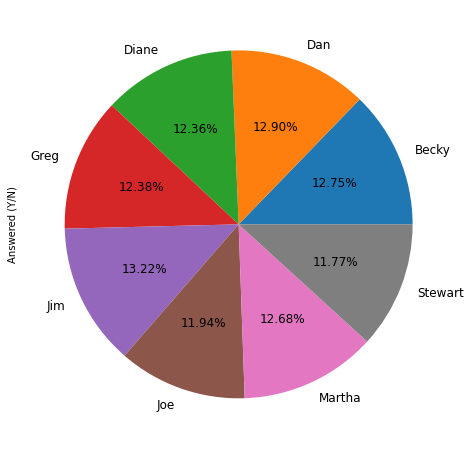

In [164]:
### Displaying with a 'pie'
pwc_call[pwc_call['Answered (Y/N)'] == 'Y'].groupby('Agent')['Answered (Y/N)'].count().plot(kind= 'pie', autopct = '%1.2f%%', figsize = (8,8), fontsize = 12)
plt.show()

out of 4054 call received by the call center, Jim recieved the highest with 536 accounting for 13.22%  followed by Dan,Becky,Martha,Greg, Diane,Joe respectively with Stewart answering the least calls with 477 accounting for 11.77%

In [165]:
### Counting the number of calls unanswered(N) by each agent
pwc_call[pwc_call['Answered (Y/N)'] == 'N'].groupby('Agent')['Answered (Y/N)'].count().reset_index().sort_values(by = 'Answered (Y/N)', ascending = False)

,Agent,Answered (Y/N)
2,Diane,132
4,Jim,130
6,Martha,124
3,Greg,122
0,Becky,114
1,Dan,110
5,Joe,109
7,Stewart,105


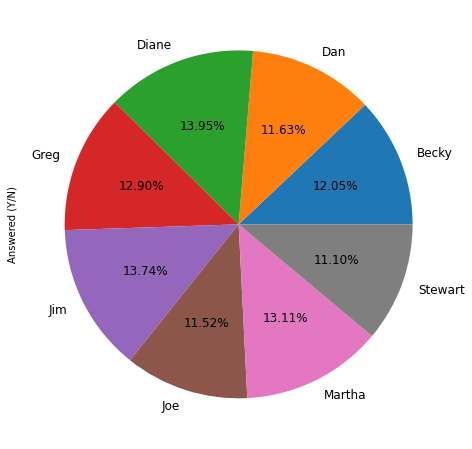

In [166]:
### Counting the number of call Unanswered(N) by each agent
pwc_call[pwc_call['Answered (Y/N)'] == 'N'].groupby('Agent')['Answered (Y/N)'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize= (8,8), fontsize = 12)
plt.show()

Out of  946 Unanswered calls,Diane had the most unanswered calls of 132 representing 13.95% followed by Jim,Martha,Greg,Becky,Joe and Stewart who recorded the least unanswered calls of 105 representing 11.10%

### Which Topic did the Agents Answer Or Not Answer the Least and Most

In [167]:
## Which topic was answered most and least
pwc_call[pwc_call['Answered (Y/N)']== 'Y'].groupby('Topic')['Answered (Y/N)'].count().reset_index().sort_values(by = 'Answered (Y/N)', ascending = False)

,Topic,Answered (Y/N)
3,Streaming,847
2,Payment related,818
4,Technical Support,805
0,Admin Support,795
1,Contract related,789


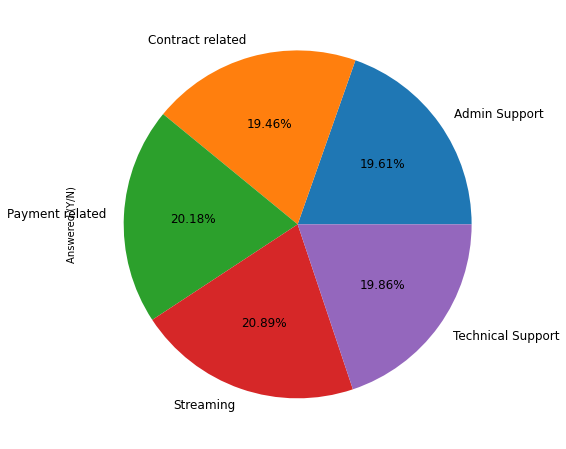

In [168]:
### Depicying with a pie chart
pwc_call[pwc_call['Answered (Y/N)']== 'Y'].groupby('Topic')['Answered (Y/N)'].count().plot(kind = 'pie', autopct ='%1.2f%%',figsize = (8,8),fontsize = 12)
plt.show()

Out of 4054 calls answered, 20.89% representing 847 calls were recorded for Streaming, followed by Payment related, technical support, Admin support and the least calls answered were for Contract related accounting for 19.46% 

In [169]:
### which topic was not answered the most and least
pwc_call[pwc_call['Answered (Y/N)']=='N'].groupby('Topic')['Answered (Y/N)'].count().reset_index().sort_values(by = 'Answered (Y/N)', ascending = False)

,Topic,Answered (Y/N)
4,Technical Support,214
2,Payment related,189
1,Contract related,187
0,Admin Support,181
3,Streaming,175


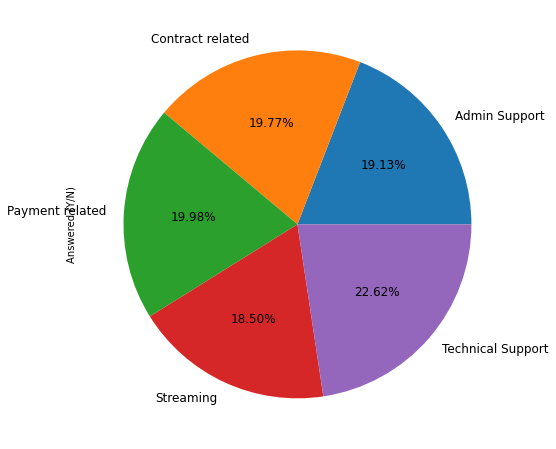

In [170]:
### Depicting the topics that were not answered with a pie chart
pwc_call[pwc_call['Answered (Y/N)']=='N'].groupby('Topic')['Answered (Y/N)'].count().plot(kind = 'pie' , autopct = "%1.2f%%", figsize = (8,8), fontsize= 12)
plt.show()

Calls for Technical Support were the most unanswered, accounting for 22.62% of all unanswered calls(946) , followed by Payment related calls, Contract Related, Admin Support calls and Streaming calls being the least unanswered accounting for 18.50% of all calls

### Which Agents answered the most and least calls for  Each Topic 

In [171]:
### Counting the number of calls concerned with Streaming per Agent
pwc_call[pwc_call['Topic'] == 'Streaming'].groupby('Agent')['Topic'].count().reset_index().sort_values(by = 'Topic', ascending = False)

,Agent,Topic
0,Becky,137
3,Greg,133
6,Martha,133
1,Dan,132
2,Diane,129
4,Jim,128
5,Joe,125
7,Stewart,105


In [172]:
### Counting the number of calls concerned with Technical Support per Agent
pwc_call[pwc_call['Topic'] == 'Technical Support'].groupby('Agent')['Topic'].count().reset_index().sort_values(by = 'Topic', ascending = False)

,Agent,Topic
1,Dan,140
6,Martha,138
4,Jim,136
2,Diane,122
7,Stewart,122
0,Becky,121
5,Joe,121
3,Greg,119


In [173]:
### Counting the number of calls concerned with Payment per Agent
pwc_call[pwc_call['Topic'] == 'Payment related'].groupby('Agent')['Topic'].count().reset_index().sort_values(by = 'Topic', ascending = False)

,Agent,Topic
0,Becky,138
1,Dan,130
3,Greg,128
2,Diane,125
6,Martha,125
5,Joe,124
7,Stewart,122
4,Jim,115


In [174]:
### Counting the number of calls concerned with Contract per Agent
pwc_call[pwc_call['Topic'] == 'Contract related'].groupby('Agent')['Topic'].count().reset_index().sort_values(by = 'Topic', ascending = False)

,Agent,Topic
4,Jim,145
6,Martha,128
7,Stewart,126
1,Dan,123
2,Diane,123
0,Becky,114
3,Greg,114
5,Joe,103


In [175]:
### Counting the number of calls concerned with Admin Support per Agent
pwc_call[pwc_call['Topic'] == 'Admin Support'].groupby('Agent')['Topic'].count().reset_index().sort_values(by = 'Topic', ascending = False)

,Agent,Topic
4,Jim,142
2,Diane,134
3,Greg,130
0,Becky,121
5,Joe,120
6,Martha,114
1,Dan,108
7,Stewart,107


### Which Agents Resolved the Most and Least Calls 

In [176]:
pwc_call.Resolved.value_counts()

Y    3646
N    1354
Name: Resolved, dtype: int64

In [177]:
### Counting the number of calls resolved by each agent
pwc_call[pwc_call['Resolved']== 'Y'].groupby('Agent')['Resolved'].count().reset_index().sort_values(by = 'Resolved', ascending = False)

,Agent,Resolved
4,Jim,485
1,Dan,471
0,Becky,462
6,Martha,461
3,Greg,455
2,Diane,452
5,Joe,436
7,Stewart,424


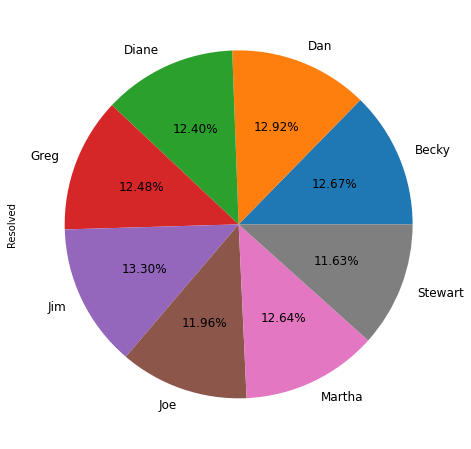

In [178]:
## depicting the number of calls resolved by each agent on a pie chart
pwc_call[pwc_call['Resolved'] == 'Y'].groupby('Agent')['Resolved'].count().plot(kind = 'pie',autopct = '%1.2f%%' , figsize =(8,8), fontsize = 12 )
plt.show()

out of a total of 5000 calls recieved by the call center, 3646 calls were resolved by all the agents combined. Of this, Jim resloved the most with 13.30% accounting for 485 resolved followed by Dan,Becky,Martha,Greg,Diane, Joe and finally Stewart resolving the least with 11.63% representing 424 resolved

In [179]:
## Counting the number of calls NOT resolved by each agent
pwc_call[pwc_call['Resolved']== 'N'].groupby('Agent')['Resolved'].count().reset_index().sort_values(by = 'Resolved',ascending = True)

,Agent,Resolved
5,Joe,157
7,Stewart,158
1,Dan,162
0,Becky,169
3,Greg,169
6,Martha,177
2,Diane,181
4,Jim,181


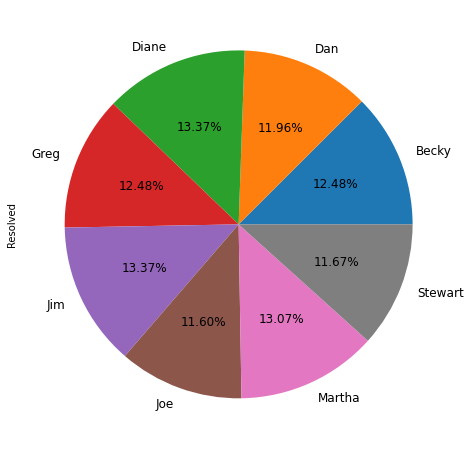

In [180]:
## depicting the number of calls not resolved by each agent on a pie chart
pwc_call[pwc_call['Resolved']== 'N'].groupby('Agent')['Resolved'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (8,8), fontsize = 12)
plt.show()

Out of the 5000 calls received,1354 calls were unresolved. Of which Joe had the least unresolved with 11.60 % accounting for 157 of all unresolved call, followed by Stewart,Dan,Greg and Becky having equal unresolved calls and finally Jim and Diane having the most unresolved calls with 13.47% accounting for 181 calls.

### Which Topic was the most Resolved and Least Resolved 

In [181]:
### Counting the number of calls Resolved for Each Topic
pwc_call[pwc_call['Resolved'] == 'Y'].groupby('Topic')['Resolved'].count().reset_index().sort_values(by = 'Resolved', ascending = False)

,Topic,Resolved
3,Streaming,749
4,Technical Support,736
2,Payment related,729
0,Admin Support,723
1,Contract related,709


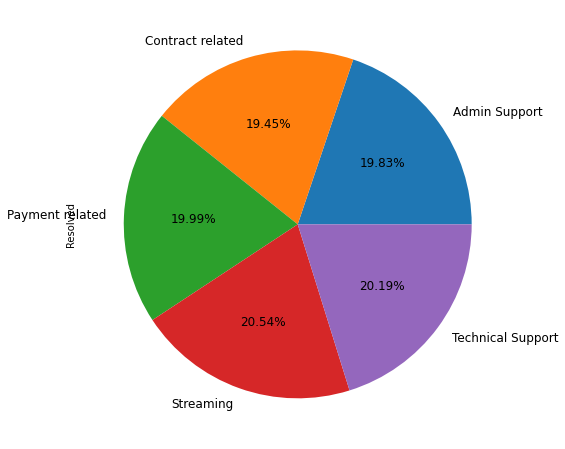

In [182]:
### depicting the number of calls Resolved for each Topic on a pie chart
pwc_call[pwc_call['Resolved'] == 'Y'].groupby('Topic')['Resolved'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (8,8), fontsize = 12)
plt.show()

Out of the 3646  calls resolved, calls concerning streaming were the most resolved accounting for 20.54% translating as 749 calls , followed by Technical Support,Payment Related,Admin support and the least resolved were calls for Contract Related making up 19.45% translating as 709 calls

In [183]:
### Counting the number of calls NOT Resolved for Each Topic
pwc_call[pwc_call['Resolved'] == 'N'].groupby('Topic')['Resolved'].count().reset_index().sort_values(by = 'Resolved', ascending = True)

,Topic,Resolved
0,Admin Support,253
1,Contract related,267
3,Streaming,273
2,Payment related,278
4,Technical Support,283


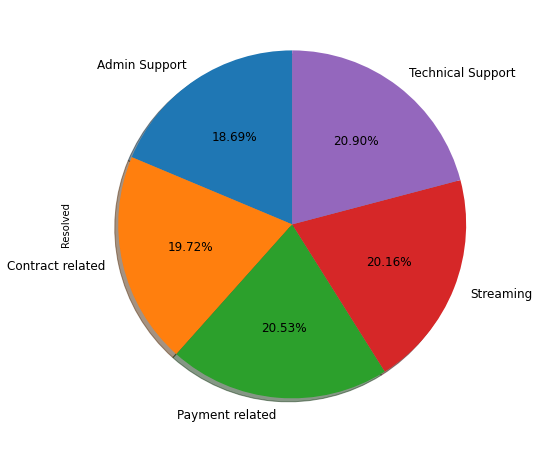

In [184]:
### Depicting the number of calls Not Resolved For each Topic
pwc_call[pwc_call['Resolved'] == 'N'].groupby('Topic')['Resolved'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (8,8), fontsize = 12, subplots = True, startangle = 90, shadow = True)
plt.show()

Out of the 1354 calls unresolved, calls concerning Admin Support were the least unresolved, followed by Contract related calls, , Streaming calls,Payment Related and finally Technical Support being the most unresolved topic with 20.90% of all unresolved calls translating as 283 calls 

In [185]:
pwc_call.groupby('Agent')['Satisfaction rating'].count().reset_index().sort_values(by = 'Satisfaction rating', ascending = False)

,Agent,Satisfaction rating
4,Jim,536
1,Dan,523
0,Becky,517
6,Martha,514
3,Greg,502
2,Diane,501
5,Joe,484
7,Stewart,477


Jim was the most rated agent with a total of 536 satisfactory ratings, followed by Dan, Becky, Martha, Greg, Diane , Joe and finally  Stewart with the least number of Satisfactory ratings with 477 

### Which Topics were the most and Least Rated

In [186]:
pwc_call.groupby('Topic')['Satisfaction rating'].count().reset_index().sort_values(by = 'Satisfaction rating', ascending = False)

,Topic,Satisfaction rating
3,Streaming,847
2,Payment related,818
4,Technical Support,805
0,Admin Support,795
1,Contract related,789


A total of 